# Importing Packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Reading cleaned Dataset

In [16]:
df = pd.read_csv('cleaned_dataset.csv')

In [45]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas',
       'horsepower-binned', 'predicted-price'],
      dtype='object')

In [46]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

# Get the Heatmap Correlations between all variables in our Dataset

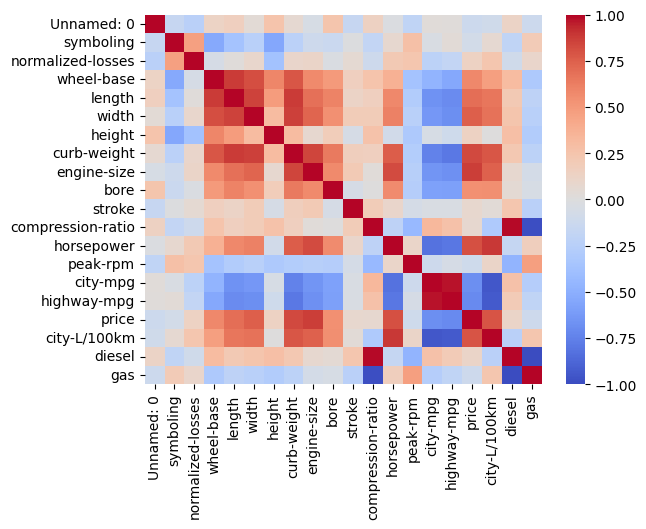

In [17]:
sns.heatmap(df.corr(numeric_only = True) , cmap='coolwarm' , annot = False)
plt.show()

# What if we want to predict car price using one variable?

# 1) Using Simple Linear Regression

# Visualize the Regression Plot of the correlation between 'highway-mpg' and 'Price'

Text(0.5, 1.0, "Regression Plot for Correlation between 'Highway-mpg' and 'Price'")

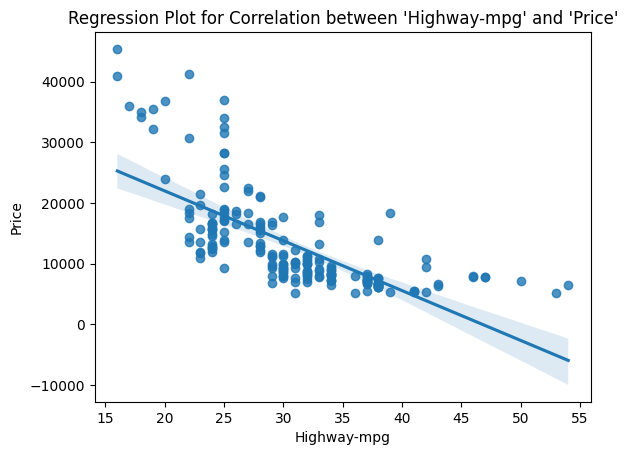

In [18]:
x = df['highway-mpg']
y = df['price']
sns.regplot(x = 'highway-mpg' , y = 'price' , data = df)
plt.xlabel("Highway-mpg")
plt.ylabel("Price")
plt.title("Regression Plot for Correlation between 'Highway-mpg' and 'Price'")

Then we see There is a negative relationship between 'highway-mpg' and 'price'

# Get the pearson Correlation between 'highway-mpg' and 'price'

In [19]:
pearson_coef_highway_mpg , p_value_highway_mpg = stats.pearsonr(df['highway-mpg'] , df['price'])

In [20]:
print("Pearson Coefficient = " ,pearson_coef_highway_mpg)
print("p-value = " , p_value_highway_mpg)

Pearson Coefficient =  -0.704692265058953
p-value =  1.7495471144475452e-31


From the result we see that : 

    1) coefficient is close to -1
    2) p-value < 0.001
    
So, the correlation between 'highway-mpg' and 'price' is "Large Negative Relationship with Strong cretainty in result"

# How could 'highway-mpg' help us predict car 'Price'?

In [21]:
lm = LinearRegression()
lm

LinearRegression()

In [119]:
X = df[['highway-mpg']]
Y = df[['price']]

# Fit the linear model using 'highway-mpg'

In [23]:
lm.fit(X , Y)

LinearRegression()

# Getting the prediction

In [123]:
Yhat = lm.predict(X)

In [124]:
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

# Getting the intercept Value

In [26]:
lm.intercept_

array([38423.30585816])

# Getting the slope Value

In [27]:
lm.coef_

array([[-821.73337832]])

# Test the Predicted price with highway : '27' Price: '13495.0'

In [28]:
predicted_price = lm.intercept_ + (lm.coef_ * 27)
predicted_price

array([[16236.50464347]])

# Getting the difference value between the predicted value and the target value

In [29]:
the_difference = predicted_price - 13495.0
the_difference

array([[2741.50464347]])

The predicted Price > The Targeted Price by 2741.51

# Testing Simple Linear model with all Car Prices of Dataset

In [30]:
lm.coef_[0][0]

-821.7333783219254

In [31]:
predicted_price = lm.intercept_ + lm.coef_[0][0] * df['highway-mpg']

In [32]:
df['predicted-price'] = predicted_price

In [33]:
df[['predicted-price']].head()

,predicted-price
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535


# Visualize the Regression Plot for Correlation between 'Predicted Price' and 'Price'

Text(0.5, 1.0, "Regression Plot for Correlation between 'Predicted Price' and 'Price'")

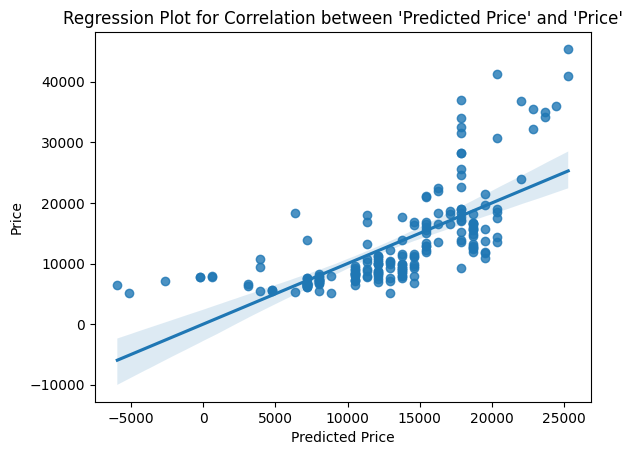

In [34]:
x = df['predicted-price']
y = df['price']
sns.regplot(x = 'predicted-price' , y = 'price' , data = df)
plt.xlabel("Predicted Price")
plt.ylabel("Price")
plt.title("Regression Plot for Correlation between 'Predicted Price' and 'Price'")

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

# Visualize the residual plots of the correlation between 'Predicted price' and 'Price'

<Axes: xlabel='predicted-price', ylabel='price'>

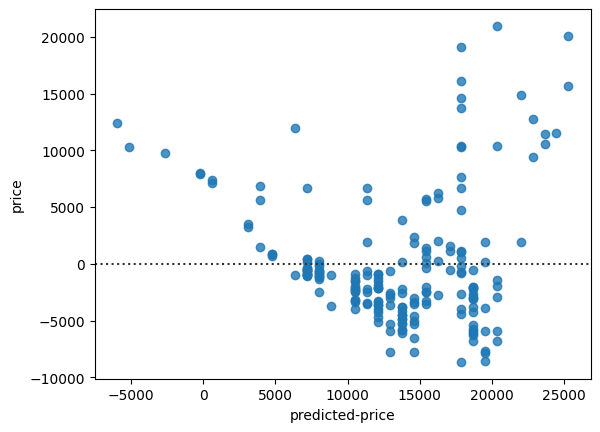

In [35]:
sns.residplot(x = df['predicted-price'] , y = df['price'])

Residuals are in a curvature form, so we need to test another independent variable

# Measures for In-Sample Evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. An R-squared of 100% means that all of the movements of a security (or another dependent variable) are completely explained by movements in the index (or whatever independent variable you are interested in).

# determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

# Let's calculate the R^2 : 

can be done after fit method

In [121]:
print('The R-squared is : ' , lm.score(X ,Y))

The R-squared is :  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "highway-mpg".

# Let's Calculate the MSE : 

can be done after predict method

In [125]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:

In [126]:
mse = mean_squared_error(df['price'] ,Yhat)
print('The mean square error of price and predicted value is : ' , mse)

The mean square error of price and predicted value is :  31635042.944639888


# How could 'engine-size' help us predict car 'Price'?

In [127]:
X = df[['engine-size']]
Y = df[['price']]
lm.fit(X , Y)

LinearRegression()

# Getting the prediction

In [128]:
Yhat = lm.predict(X)

In [129]:
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

# Getting the intercept Value

In [130]:
lm.intercept_

array([-7963.33890628])

# Getting the slope

In [131]:
lm.coef_

array([[166.86001569]])

# Let's Calculate the R^2 : 

In [132]:
print('The R-squared is : ' , lm.score(X ,Y))

The R-squared is :  0.7609686443622008


# Let's Calculate the MSE : 

In [133]:
mse = mean_squared_error(df['price'] ,Yhat)
print('The mean square error of price and predicted value is : ' , mse)

The mean square error of price and predicted value is :  15021126.02517414


# What if we want to predict car price using more than one variable?

# 2) Using Multiple Linear Regression

# Get the Heatmap Correlations between all variables in our Dataset

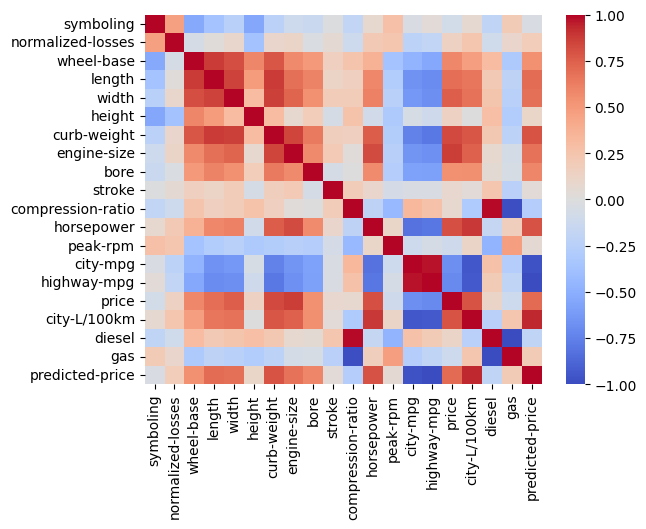

In [47]:
sns.heatmap(df.corr(numeric_only = True) , cmap='coolwarm' , annot = False)
plt.show()

<p>From the previous Plot we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [134]:
Z = df[['horsepower' , 'curb-weight' , 'engine-size' , 'highway-mpg']]

# Fit the Mulitple linear model using the four above mentioned variables

In [135]:
lm.fit(Z , df['price'])

LinearRegression()

# Predict the first four values of price with the predicted ones

In [136]:
multiple_regression_prediction = lm.predict(Z)

In [139]:
multiple_regression_prediction[0 : 4]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404])

In [140]:
df[['price']].head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


# Getting the intercept value

In [141]:
lm.intercept_

-15811.863767729217

# Getting the slope values

In [142]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

# Saving the last prediction of Multiple Linear Regression to our Dataset

In [58]:
df['predicted-price-4v-mlr'] = lm.predict(Z)

In [60]:
df[['price' , 'predicted-price' , 'predicted-price-4v-mlr']].head()

,price,predicted-price,predicted-price-4v-mlr
0,13495.0,16236.504643,13699.077005
1,16500.0,16236.504643,13699.077005
2,16500.0,17058.238022,19052.713467
3,13950.0,13771.304508,10620.615244
4,17450.0,20345.171535,15520.900253


# Visualize the residual plots of the correlation between 'Predicted-price-4v-mlr' and 'Price'

<Axes: xlabel='predicted-price-4v-mlr', ylabel='price'>

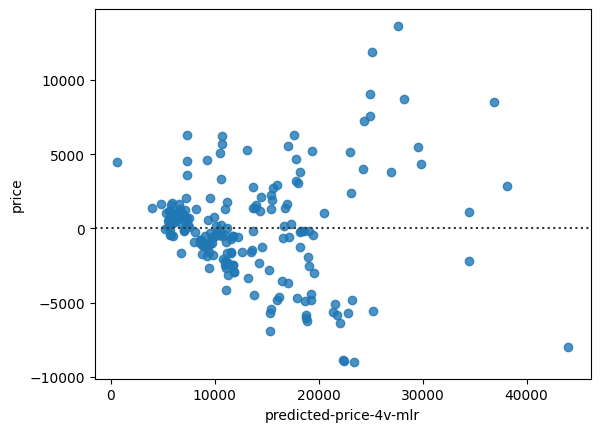

In [61]:
sns.residplot(x = df['predicted-price-4v-mlr'] , y = df['price'])

# Let's Calculate the R^2 : 

In [143]:
print('The R-squared is : ' , lm.score(Z , df['price']))

The R-squared is :  0.8093732522175299


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

# Let's Calculate the MSE : 

In [145]:
print('the mean square error of price and predicted value : ' , mean_squared_error(df['price'] , multiple_regression_prediction))

the mean square error of price and predicted value :  11979300.349818882


# Another Try will be with the predictors 'highway-mpg' and 'normalized-losses'

In [62]:
Z = df[['normalized-losses' , 'highway-mpg']]

# Fit the multiple linear model using the two above mentioned variables

In [63]:
lm.fit(Z , df['price'])

LinearRegression()

# Predict the first four values of price with the predicted ones

In [64]:
multiple_regression_prediction = lm.predict(Z)
multiple_regression_prediction[0 : 4]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916])

In [66]:
df['predicted-price-2v-mlr'] = lm.predict(Z)

In [68]:
df[['price' , 'predicted-price' , 'predicted-price-4v-mlr' , 'predicted-price-2v-mlr']].head()

,price,predicted-price,predicted-price-4v-mlr,predicted-price-2v-mlr
0,13495.0,16236.504643,13699.077005,16231.789383
1,16500.0,16236.504643,13699.077005,16231.789383
2,16500.0,17058.238022,19052.713467,17052.243724
3,13950.0,13771.304508,10620.615244,13833.337989
4,17450.0,20345.171535,15520.900253,20396.972710


# Getting the intercept value

In [69]:
lm.intercept_

38201.31327245727

# Getting the Slope values

In [70]:
lm.coef_

array([   1.49789586, -820.45434016])

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2
$$

What is the linear function we get in this example?


<b>Price</b> = 38201.31327245727 + 1.49789586 x <b>normalized-losses</b> + -820.45434016 x <b>highway-mpg</b> 

# Visualize the residual plots of the correlation between 'Predicted-price-2v-mlr' and 'Price'

<Axes: xlabel='predicted-price-2v-mlr', ylabel='price'>

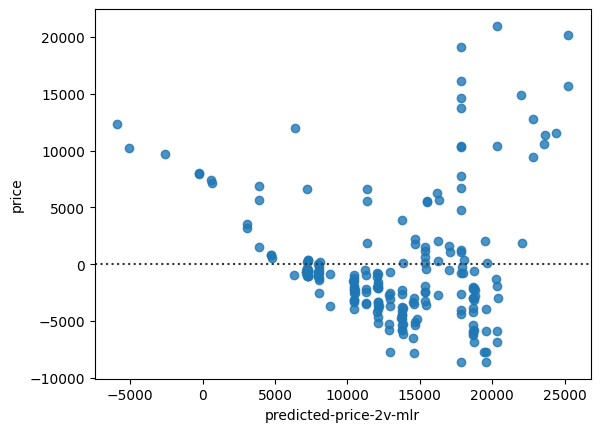

In [73]:
sns.residplot(x = df['predicted-price-2v-mlr'] , y = df['price'])

<h3>Multiple Linear Regression</h3>

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

# Using Distribution Plot between 'predicted-price-4v-mlr' and 'Price'

C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_18812\3338324413.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_18812\3338324413.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


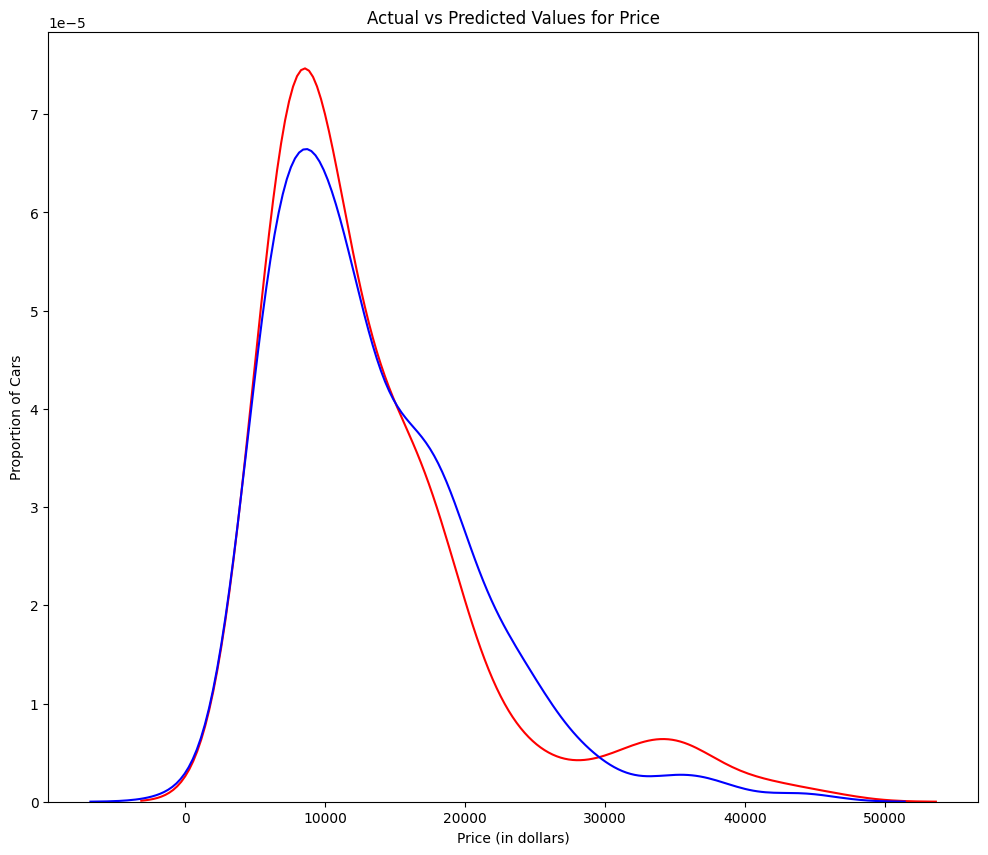

In [75]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(df['predicted-price-4v-mlr'], hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

# Using Distribution Plot between 'predicted-price-2v-mlr' and 'Price'

C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_18812\1230276326.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_18812\1230276326.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


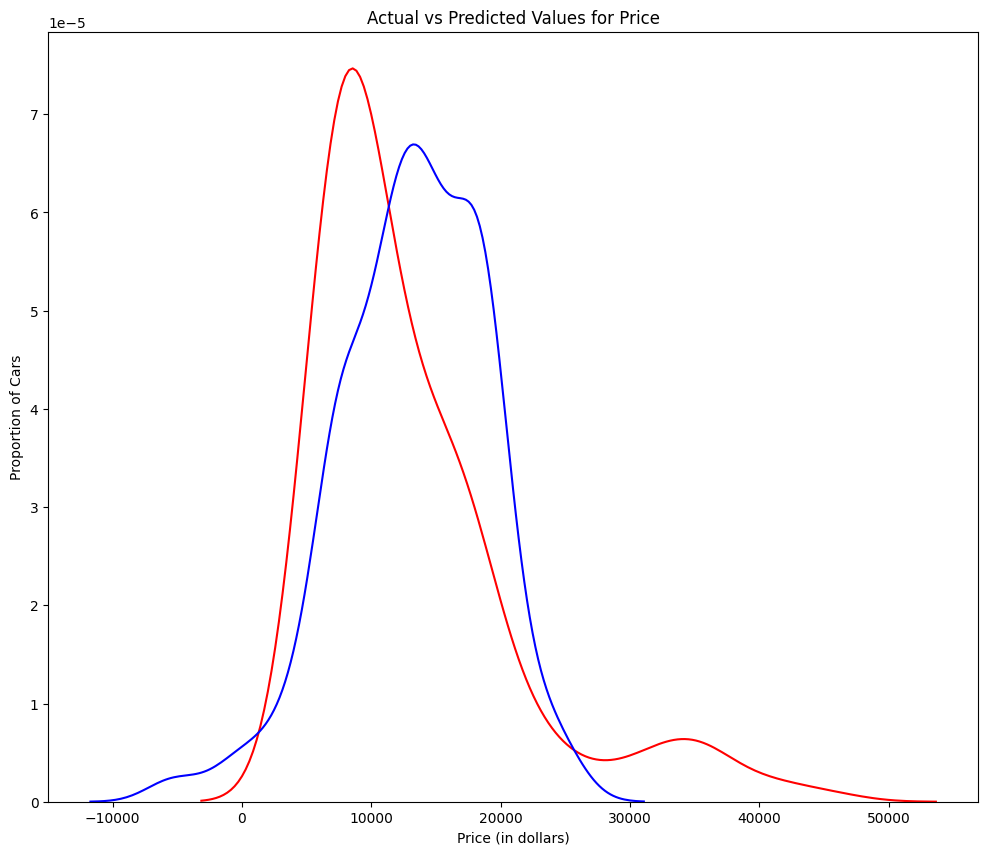

In [76]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(df['predicted-price-2v-mlr'], hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We saw earlier that a linear model did not provide the best fit . Let's see if we can try fitting a polynomial model to the data instead.

# 3) Polynomial Regression and Pipelines

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$


We will use the following function to plot the data:

In [78]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

# Let's use 'highway-mpg' as the predictor for 'Price'

In [147]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [148]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


# Let's plot the function

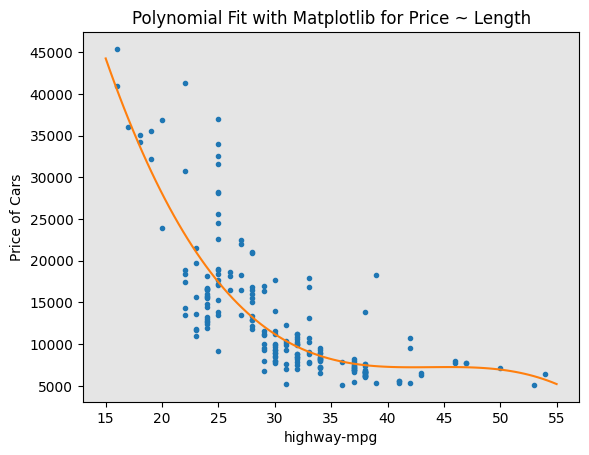

In [149]:
PlotPolly(p , x , y , 'highway-mpg')

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

# Let's Predict a 'Price' value using highway-mpg '27'

In [150]:
poly_predicted_price_3rd_order = np.polyval(f , 27)

In [151]:
poly_predicted_price_3rd_order

14483.477326064865

Another way to predict a 'Price' value using 'highway-mpg' = 27

In [156]:
p(27)

14483.477326064865

In [152]:
df[['highway-mpg' , 'price']]

,highway-mpg,price
0,27,13495.0
1,27,16500.0
2,26,16500.0
3,30,13950.0
4,22,17450.0
...,...,...
196,28,16845.0
197,25,19045.0
198,23,21485.0
199,27,22470.0


# Getting Prediction for all 'highway-mpg' in our dataset and Adding new column 'predicted-price-3rd-pr' to our dataframe 

In [153]:
df['predicted-price-3rd-pr'] = np.polyval(f , df['highway-mpg'])

In [154]:
df[['highway-mpg' , 'price' , 'predicted-price-3rd-pr']].head(20)

,highway-mpg,price,predicted-price-3rd-pr
0,27,13495.0,14483.477326
1,27,16500.0,14483.477326
2,26,16500.0,15876.769087
3,30,13950.0,11210.241987
4,22,17450.0,23210.064824
5,25,15250.0,17436.733887
6,25,17710.0,17436.733887
7,25,18920.0,17436.733887
8,20,23875.0,28063.547526
9,29,16430.0,12159.553606


# Another way to get the prediction of 'price' according to all 'highway-mpg' values

In [176]:
another_method_poly_predicted_price_3rd_order = pd.DataFrame(p(x) , columns = ['another_method_poly_predicted_price_3rd_order'])

In [177]:
another_method_poly_predicted_price_3rd_order.head()

,another_method_poly_predicted_price_3rd_order
0,14483.477326
1,14483.477326
2,15876.769087
3,11210.241987
4,23210.064824


# Let's calculate the R^2 : 

In [146]:
from sklearn.metrics import r2_score

In [178]:
r_squared = r2_score(y , p(x))
print('The R-squared value is : ' , r_squared)

The R-squared value is :  0.674194666390652


# Let's calculate the MSE :

In [179]:
mean_squared_error(df['price'] , p(x))

20474146.426361218

# Here we use a polynomial of the 11rd order (cubic)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


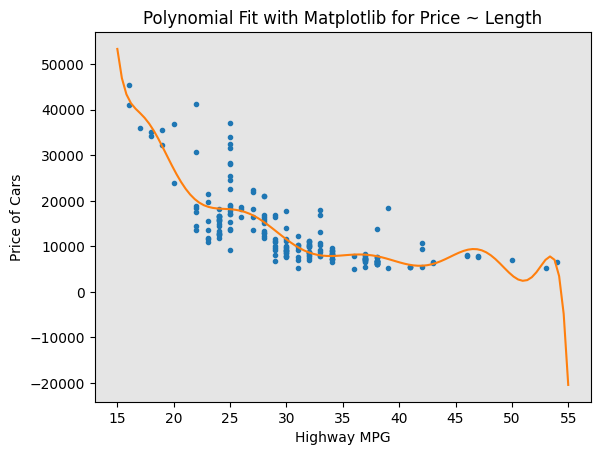

In [86]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

# Let's Predict a 'Price' value using highway-mpg '27'

In [98]:
np.polyval(f1 , 27.0)

16851.557509481907

In [99]:
df['predicted-price-11rd-pr'] = np.polyval(f1 , df['highway-mpg'])

In [103]:
df[['highway-mpg' , 'price' , 'predicted-price-3rd-pr','predicted-price-11rd-pr']].head(20)

,highway-mpg,price,predicted-price-3rd-pr,predicted-price-11rd-pr
0,27,13495.0,14483.477326,16851.557509
1,27,16500.0,14483.477326,16851.557509
2,26,16500.0,15876.769087,17774.893744
3,30,13950.0,11210.241987,11539.504885
4,22,17450.0,23210.064824,20089.538199
5,25,15250.0,17436.733887,18154.055469
6,25,17710.0,17436.733887,18154.055469
7,25,18920.0,17436.733887,18154.055469
8,20,23875.0,28063.547526,27001.254939
9,29,16430.0,12159.553606,13479.193729


# 4) Multivariate Polynomial Regression

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:

In [104]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [106]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [105]:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [107]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.

In [108]:
Z.shape

(201, 4)

In [110]:
Z_pr.shape

(201, 15)

After the transformation, there are 201 samples and 15 features.

# Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [113]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [114]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously. 

In [115]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [116]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

In [117]:
df['predicted-price-2deg-mpr'] = ypipe

In [118]:
df[['highway-mpg' , 'horsepower' , 'curb-weight' , 'engine-size' , 'price' , 'predicted-price-2deg-mpr']].head()

,highway-mpg,horsepower,curb-weight,engine-size,price,predicted-price-2deg-mpr
0,27,111,2548,130,13495.0,13102.933296
1,27,111,2548,130,16500.0,13102.933296
2,26,154,2823,152,16500.0,18226.434503
3,30,102,2337,109,13950.0,10391.091840
4,22,115,2824,136,17450.0,16135.537375


# Decision Making : Determining a Good Model Fit : 

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>

<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


# Conclusion

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
